# Лабораторная работа 3.
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Ньяти Каелиле БВТ2201
***

### Задание

1.  Реализовать алгоритмы поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа.

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса.

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

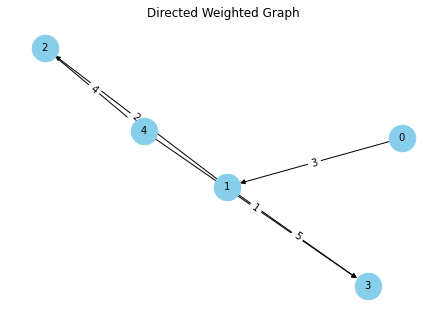

In [1]:
# 1) Алгоритм Флойда-Уоршелла

import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import sys

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \tDistance Matrix")
        for i in range(self.V):
            for j in range(self.V):
                if dist[i][j] == sys.maxsize:
                    print("INF", end="\t")
                else:
                    print(dist[i][j], end="\t")
            print()

    def floydWarshall(self):
        dist = [row[:] for row in self.graph]

        for k in range(self.V):
            for i in range(self.V):
                for j in range(self.V):
                    if dist[i][k] != 0 and dist[k][j] != 0 and (dist[i][j] == 0 or dist[i][k] + dist[k][j] < dist[i][j]):
                        dist[i][j] = dist[i][k] + dist[k][j]
        return dist

    def draw_graph(self):
        G = nx.DiGraph()
        G.add_nodes_from(range(self.V))

        for i in range(self.V):
            for j in range(self.V):
                if self.graph[i][j] != 0:
                    G.add_edge(i, j, weight=self.graph[i][j])

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Directed Weighted Graph")
        plt.show()

class GUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Shortest Path Calculator")

        self.label1 = tk.Label(master, text="Choose File:")
        self.label1.grid(row=0, column=0)

        self.file_button = tk.Button(master, text="Browse", command=self.browse_file)
        self.file_button.grid(row=0, column=1)

        self.label2 = tk.Label(master, text="Source Vertex:")
        self.label2.grid(row=1, column=0)

        self.source_entry = tk.Entry(master)
        self.source_entry.grid(row=1, column=1)

        self.label3 = tk.Label(master, text="Destination Vertex:")
        self.label3.grid(row=2, column=0)

        self.dest_entry = tk.Entry(master)
        self.dest_entry.grid(row=2, column=1)

        self.calc_button = tk.Button(master, text="Calculate Shortest Path", command=self.calculate_shortest_path)
        self.calc_button.grid(row=3, columnspan=2)

        self.draw_button = tk.Button(master, text="Draw Graph", command=self.draw_graph)
        self.draw_button.grid(row=4, columnspan=2)

        self.adjacency_matrix = None

    def browse_file(self):
        filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if filename:
            self.adjacency_matrix = read_adjacency_matrix(filename)

    def calculate_shortest_path(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        try:
            source = int(self.source_entry.get())
            dest = int(self.dest_entry.get())
            if source < 0 or source >= len(self.adjacency_matrix) or dest < 0 or dest >= len(self.adjacency_matrix):
                messagebox.showerror("Error", "Invalid vertex index")
                return
            g = Graph(len(self.adjacency_matrix))
            g.graph = self.adjacency_matrix
            shortest_paths = g.floydWarshall()
            shortest_path_dist = shortest_paths[source][dest]
            messagebox.showinfo("Shortest Path Distance", f"The shortest distance from vertex {source} to vertex {dest} is: {shortest_path_dist}")
        except ValueError:
            messagebox.showerror("Error", "Please enter valid integer vertex indices")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

    def draw_graph(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        g = Graph(len(self.adjacency_matrix))
        g.graph = self.adjacency_matrix
        g.draw_graph()

# Read the adjacency matrix from file
def read_adjacency_matrix(filename):
    with open(filename, 'r') as file:
        adjacency_matrix = [[int(num) for num in line.split()] for line in file]
    return adjacency_matrix

# Driver's code
if __name__ == "__main__":
    root = tk.Tk()
    gui = GUI(root)
    root.mainloop()


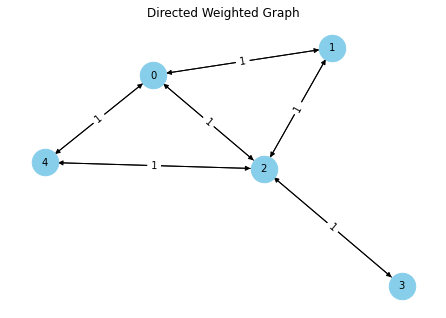

In [6]:
# 2) Алгоритм Дейкстры 

import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import sys

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    def minDistance(self, dist, sptSet):
        min = sys.maxsize
        min_index = -1
        for u in range(self.V):
            if dist[u] < min and not sptSet[u]:
                min = dist[u]
                min_index = u
        return min_index

    def dijkstra(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V

        for _ in range(self.V):
            x = self.minDistance(dist, sptSet)
            sptSet[x] = True

            for y in range(self.V):
                if self.graph[x][y] > 0 and not sptSet[y] and dist[y] > dist[x] + self.graph[x][y]:
                    dist[y] = dist[x] + self.graph[x][y]

        return dist

    def draw_graph(self):
        G = nx.DiGraph()
        G.add_nodes_from(range(self.V))

        for i in range(self.V):
            for j in range(self.V):
                if self.graph[i][j] != 0:
                    G.add_edge(i, j, weight=self.graph[i][j])

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Directed Weighted Graph")
        plt.show()

class GUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Shortest Path Calculator")

        self.label1 = tk.Label(master, text="Choose File:")
        self.label1.grid(row=0, column=0)

        self.file_button = tk.Button(master, text="Browse", command=self.browse_file)
        self.file_button.grid(row=0, column=1)

        self.label2 = tk.Label(master, text="Source Vertex:")
        self.label2.grid(row=1, column=0)

        self.source_entry = tk.Entry(master)
        self.source_entry.grid(row=1, column=1)

        self.label3 = tk.Label(master, text="Destination Vertex:")
        self.label3.grid(row=2, column=0)

        self.dest_entry = tk.Entry(master)
        self.dest_entry.grid(row=2, column=1)

        self.calc_button = tk.Button(master, text="Calculate Shortest Path", command=self.calculate_shortest_path)
        self.calc_button.grid(row=3, columnspan=2)

        self.draw_button = tk.Button(master, text="Draw Graph", command=self.draw_graph)
        self.draw_button.grid(row=4, columnspan=2)

        self.adjacency_matrix = None

    def browse_file(self):
        filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if filename:
            self.adjacency_matrix = read_adjacency_matrix(filename)

    def calculate_shortest_path(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        try:
            source = int(self.source_entry.get())
            dest = int(self.dest_entry.get())
            if source < 0 or source >= len(self.adjacency_matrix) or dest < 0 or dest >= len(self.adjacency_matrix):
                messagebox.showerror("Error", "Invalid vertex index")
                return
            g = Graph(len(self.adjacency_matrix))
            g.graph = self.adjacency_matrix
            shortest_dist = g.dijkstra(source)
            shortest_path_dist = shortest_dist[dest]
            messagebox.showinfo("Shortest Path Distance", f"The shortest distance from vertex {source} to vertex {dest} is: {shortest_path_dist}")
        except ValueError:
            messagebox.showerror("Error", "Please enter valid integer vertex indices")

    def draw_graph(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        g = Graph(len(self.adjacency_matrix))
        g.graph = self.adjacency_matrix
        g.draw_graph()

# Read the adjacency matrix from file
def read_adjacency_matrix(filename):
    with open(filename, 'r') as file:
        adjacency_matrix = [[int(num) for num in line.split()] for line in file]
    return adjacency_matrix

# Driver's code
if __name__ == "__main__":
    root = tk.Tk()
    gui = GUI(root)
    root.mainloop()

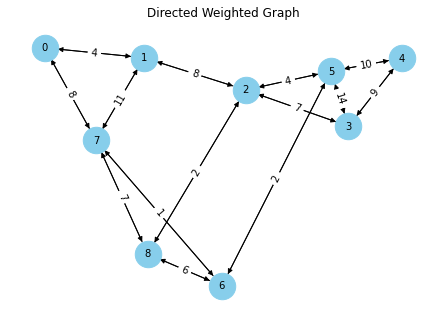

In [2]:
# 3) Алгоритм Беллмана-Форда 

import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import sys

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0

        for _ in range(self.V - 1):
            for u in range(self.V):
                for v in range(self.V):
                    if self.graph[u][v] != 0 and dist[u] != sys.maxsize and dist[u] + self.graph[u][v] < dist[v]:
                        dist[v] = dist[u] + self.graph[u][v]

        for u in range(self.V):
            for v in range(self.V):
                if self.graph[u][v] != 0 and dist[u] != sys.maxsize and dist[u] + self.graph[u][v] < dist[v]:
                    print("Graph contains negative weight cycle")
                    return None

        return dist

    def draw_graph(self):
        G = nx.DiGraph()

        for u in range(self.V):
            for v in range(self.V):
                if self.graph[u][v] != 0:
                    G.add_edge(u, v, weight=self.graph[u][v])

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Directed Weighted Graph")
        plt.show()

class GUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Shortest Path Calculator")

        self.label1 = tk.Label(master, text="Choose File:")
        self.label1.grid(row=0, column=0)

        self.file_button = tk.Button(master, text="Browse", command=self.browse_file)
        self.file_button.grid(row=0, column=1)

        self.label2 = tk.Label(master, text="Source Vertex:")
        self.label2.grid(row=1, column=0)

        self.source_entry = tk.Entry(master)
        self.source_entry.grid(row=1, column=1)

        self.label3 = tk.Label(master, text="Destination Vertex:")
        self.label3.grid(row=2, column=0)

        self.dest_entry = tk.Entry(master)
        self.dest_entry.grid(row=2, column=1)

        self.adjacency_matrix = None

        self.calc_button = tk.Button(master, text="Calculate Shortest Path", command=self.calculate_shortest_path)
        self.calc_button.grid(row=3, columnspan=2)

        self.draw_button = tk.Button(master, text="Draw Graph", command=self.draw_graph)
        self.draw_button.grid(row=4, columnspan=2)

    def browse_file(self):
        filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if filename:
            self.adjacency_matrix = read_adjacency_matrix(filename)

    def calculate_shortest_path(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        try:
            source = int(self.source_entry.get())
            dest = int(self.dest_entry.get())
            if source < 0 or source >= len(self.adjacency_matrix) or dest < 0 or dest >= len(self.adjacency_matrix):
                messagebox.showerror("Error", "Invalid vertex index")
                return
            g = Graph(len(self.adjacency_matrix))
            g.graph = self.adjacency_matrix
            shortest_dist = g.bellman_ford(source)
            if shortest_dist:
                shortest_path_dist = shortest_dist[dest]
                messagebox.showinfo("Shortest Path Distance", f"The shortest distance from vertex {source} to vertex {dest} is: {shortest_path_dist}")
        except ValueError:
            messagebox.showerror("Error", "Please enter valid integer vertex indices")

    def draw_graph(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        g = Graph(len(self.adjacency_matrix))
        g.graph = self.adjacency_matrix
        g.draw_graph()

# Read the adjacency matrix from file
def read_adjacency_matrix(filename):
    with open(filename, 'r') as file:
        adjacency_matrix = [[int(num) for num in line.split()] for line in file]
    return adjacency_matrix

# Driver's code
if __name__ == "__main__":
    root = tk.Tk()
    gui = GUI(root)
    root.mainloop()


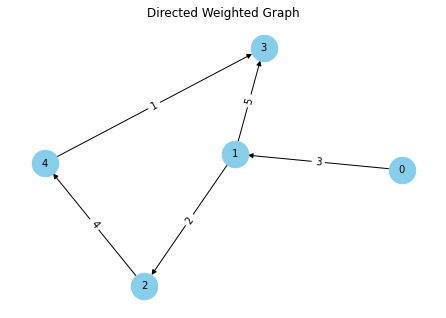

In [9]:
# 4) Алгоритм Джонсона

import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import sys

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    def minDistance(self, dist, sptSet):
        min = sys.maxsize
        min_index = -1
        for u in range(self.V):
            if dist[u] < min and not sptSet[u]:
                min = dist[u]
                min_index = u
        return min_index

    def bellman_ford(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0

        for _ in range(self.V - 1):
            for u in range(self.V):
                for v in range(self.V):
                    if self.graph[u][v] != 0:
                        if dist[u] + self.graph[u][v] < dist[v]:
                            dist[v] = dist[u] + self.graph[u][v]

        return dist

    def reweight(self, dist):
        for u in range(self.V):
            for v in range(self.V):
                if self.graph[u][v] != 0:
                    self.graph[u][v] += dist[u] - dist[v]

    def dijkstra(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        sptSet = [False] * self.V

        for _ in range(self.V):
            x = self.minDistance(dist, sptSet)
            sptSet[x] = True

            for y in range(self.V):
                if self.graph[x][y] > 0 and not sptSet[y] and dist[y] > dist[x] + self.graph[x][y]:
                    dist[y] = dist[x] + self.graph[x][y]

        return dist

    def all_pairs_shortest_paths(self):
        all_shortest_paths = []
        for i in range(self.V):
            shortest_paths = self.dijkstra(i)
            all_shortest_paths.append(shortest_paths)
        return all_shortest_paths

    def draw_graph(self):
        G = nx.DiGraph()
        G.add_nodes_from(range(self.V))

        for i in range(self.V):
            for j in range(self.V):
                if self.graph[i][j] != 0:
                    G.add_edge(i, j, weight=self.graph[i][j])

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Directed Weighted Graph")
        plt.show()

class GUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Shortest Path Calculator")

        self.label1 = tk.Label(master, text="Choose File:")
        self.label1.grid(row=0, column=0)

        self.file_button = tk.Button(master, text="Browse", command=self.browse_file)
        self.file_button.grid(row=0, column=1)

        self.label2 = tk.Label(master, text="Source Vertex:")
        self.label2.grid(row=1, column=0)

        self.source_entry = tk.Entry(master)
        self.source_entry.grid(row=1, column=1)

        self.label3 = tk.Label(master, text="Destination Vertex:")
        self.label3.grid(row=2, column=0)

        self.dest_entry = tk.Entry(master)
        self.dest_entry.grid(row=2, column=1)

        self.calc_button = tk.Button(master, text="Calculate Shortest Path", command=self.calculate_shortest_path)
        self.calc_button.grid(row=3, columnspan=2)

        self.draw_button = tk.Button(master, text="Draw Graph", command=self.draw_graph)
        self.draw_button.grid(row=4, columnspan=2)

        self.adjacency_matrix = None

    def browse_file(self):
        filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if filename:
            self.adjacency_matrix = read_adjacency_matrix(filename)

    def calculate_shortest_path(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        try:
            source = int(self.source_entry.get())
            dest = int(self.dest_entry.get())
            if source < 0 or source >= len(self.adjacency_matrix) or dest < 0 or dest >= len(self.adjacency_matrix):
                messagebox.showerror("Error", "Invalid vertex index")
                return
            g = Graph(len(self.adjacency_matrix))
            g.graph = self.adjacency_matrix
            shortest_paths = g.all_pairs_shortest_paths()
            shortest_path_dist = shortest_paths[source][dest]
            messagebox.showinfo("Shortest Path Distance", f"The shortest distance from vertex {source} to vertex {dest} is: {shortest_path_dist}")
        except ValueError:
            messagebox.showerror("Error", "Please enter valid integer vertex indices")

    def draw_graph(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        g = Graph(len(self.adjacency_matrix))
        g.graph = self.adjacency_matrix
        g.draw_graph()

# Read the adjacency matrix from file
def read_adjacency_matrix(filename):
    with open(filename, 'r') as file:
        adjacency_matrix = [[int(num) for num in line.split()] for line in file]
    return adjacency_matrix

# Driver's code
if __name__ == "__main__":
    root = tk.Tk()
    gui = GUI(root)
    root.mainloop()



In [ ]:
# 5) Алгоритм Левита

import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import sys

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for _ in range(vertices)] for _ in range(vertices)]

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    def levit(self, src):
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        queue = []
        queue.append(src)

        while queue:
            u = queue.pop(0)
            for v in range(self.V):
                if self.graph[u][v] != 0:
                    if dist[v] > dist[u] + self.graph[u][v]:
                        dist[v] = dist[u] + self.graph[u][v]
                        if v not in queue:
                            if self.graph[v][u] == 0:
                                queue.append(v)
                            else:
                                queue.insert(0, v)

        return dist

    def draw_graph(self):
        G = nx.DiGraph()
        G.add_nodes_from(range(self.V))

        for i in range(self.V):
            for j in range(self.V):
                if self.graph[i][j] != 0:
                    G.add_edge(i, j, weight=self.graph[i][j])

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Directed Weighted Graph")
        plt.show()

class GUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Shortest Path Calculator")

        self.label1 = tk.Label(master, text="Choose File:")
        self.label1.grid(row=0, column=0)

        self.file_button = tk.Button(master, text="Browse", command=self.browse_file)
        self.file_button.grid(row=0, column=1)

        self.label2 = tk.Label(master, text="Source Vertex:")
        self.label2.grid(row=1, column=0)

        self.source_entry = tk.Entry(master)
        self.source_entry.grid(row=1, column=1)

        self.label3 = tk.Label(master, text="Destination Vertex:")
        self.label3.grid(row=2, column=0)

        self.dest_entry = tk.Entry(master)
        self.dest_entry.grid(row=2, column=1)

        self.calc_button = tk.Button(master, text="Calculate Shortest Path", command=self.calculate_shortest_path)
        self.calc_button.grid(row=3, columnspan=2)

        self.draw_button = tk.Button(master, text="Draw Graph", command=self.draw_graph)
        self.draw_button.grid(row=4, columnspan=2)

        self.adjacency_matrix = None

    def browse_file(self):
        filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if filename:
            self.adjacency_matrix = read_adjacency_matrix(filename)

    def calculate_shortest_path(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        try:
            source = int(self.source_entry.get())
            dest = int(self.dest_entry.get())
            if source < 0 or source >= len(self.adjacency_matrix) or dest < 0 or dest >= len(self.adjacency_matrix):
                messagebox.showerror("Error", "Invalid vertex index")
                return
            g = Graph(len(self.adjacency_matrix))
            g.graph = self.adjacency_matrix
            shortest_dist = g.levit(source)
            shortest_path_dist = shortest_dist[dest]
            messagebox.showinfo("Shortest Path Distance", f"The shortest distance from vertex {source} to vertex {dest} is: {shortest_path_dist}")
        except ValueError:
            messagebox.showerror("Error", "Please enter valid integer vertex indices")

    def draw_graph(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        g = Graph(len(self.adjacency_matrix))
        g.graph = self.adjacency_matrix
        g.draw_graph()

# Read the adjacency matrix from file
def read_adjacency_matrix(filename):
    with open(filename, 'r') as file:
        adjacency_matrix = [[int(num) for num in line.split()] for line in file]
    return adjacency_matrix

# Driver's code
if __name__ == "__main__":
    root = tk.Tk()
    gui = GUI(root)
    root.mainloop()


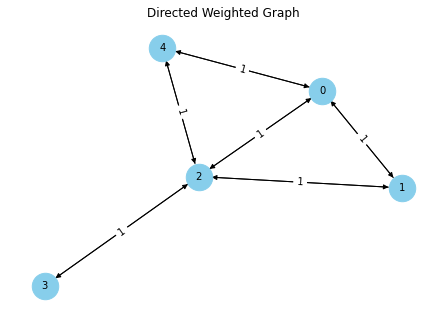

In [10]:
# 6) Алгоритм Йена

import tkinter as tk
from tkinter import filedialog, messagebox
import networkx as nx
import matplotlib.pyplot as plt
import sys

class Graph:
    def __init__(self, vertices, adjacency_matrix):
        self.V = vertices
        self.graph = adjacency_matrix

    def yen_k_shortest_paths(self, src, dest):
        def dijkstra(src, dest):
            dist = [sys.maxsize] * self.V
            dist[src] = 0
            sptSet = [False] * self.V

            for _ in range(self.V):
                x = self.min_distance(dist, sptSet)
                sptSet[x] = True

                for y in range(self.V):
                    if self.graph[x][y] > 0 and not sptSet[y] and dist[y] > dist[x] + self.graph[x][y]:
                        dist[y] = dist[x] + self.graph[x][y]

            return dist[dest]

        def next_shortest_path(curr_path):
            for i in range(len(curr_path) - 1):
                spur_node = curr_path[i]
                root_path = curr_path[:i + 1]

                edges_removed = []
                for path in paths:
                    if len(path) > i and root_path == path[:i + 1]:
                        edge = (path[i], path[i + 1])
                        self.graph[edge[0]][edge[1]] = 0
                        edges_removed.append(edge)

                spur_path_len = dijkstra(spur_node, dest)
                if spur_path_len != sys.maxsize:
                    total_path = root_path[:-1] + curr_path[i:]
                    total_path_weight = sum(self.graph[total_path[j]][total_path[j + 1]] for j in range(len(total_path) - 1))
                    potential_path = (total_path_weight, total_path)

                    if potential_path not in candidates:
                        candidates.append(potential_path)

                for edge in edges_removed:
                    self.graph[edge[0]][edge[1]] = self.graph_copy[edge[0]][edge[1]]

        if src == dest:
            return [[src]]

        candidates = []
        paths = []
        self.graph_copy = [row[:] for row in self.graph]

        for _ in range(1):
            shortest_dist = dijkstra(src, dest)
            if shortest_dist == sys.maxsize:
                break
            path = self.dijkstra(src, dest)
            paths.append(path)
            next_shortest_path(path)

            if not candidates:
                break

            candidates.sort()
            shortest_path = candidates.pop(0)[1]
            paths.append(shortest_path)

        return paths

    def min_distance(self, dist, sptSet):
        min_dist = sys.maxsize
        min_index = -1
        for v in range(self.V):
            if dist[v] < min_dist and not sptSet[v]:
                min_dist = dist[v]
                min_index = v
        return min_index

    def dijkstra(self, src, dest):
        dist = [sys.maxsize] * self.V
        prev = [-1] * self.V
        dist[src] = 0
        sptSet = [False] * self.V

        for _ in range(self.V):
            u = self.min_distance(dist, sptSet)
            sptSet[u] = True

            if u == dest:
                break

            for v in range(self.V):
                if not sptSet[v] and self.graph[u][v] and dist[u] != sys.maxsize and dist[u] + self.graph[u][v] < dist[v]:
                    dist[v] = dist[u] + self.graph[u][v]
                    prev[v] = u

        path = []
        while dest != -1:
            path.insert(0, dest)
            dest = prev[dest]

        return path

    def draw_graph(self):
        G = nx.DiGraph()
        G.add_nodes_from(range(self.V))

        for i in range(self.V):
            for j in range(self.V):
                if self.graph[i][j] != 0:
                    G.add_edge(i, j, weight=self.graph[i][j])

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
        edge_labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Directed Weighted Graph")
        plt.show()

class GUI:
    def __init__(self, master):
        self.master = master
        self.master.title("Shortest Path Calculator")

        self.label1 = tk.Label(master, text="Choose File:")
        self.label1.grid(row=0, column=0)

        self.file_button = tk.Button(master, text="Browse", command=self.browse_file)
        self.file_button.grid(row=0, column=1)

        self.label2 = tk.Label(master, text="Source Vertex:")
        self.label2.grid(row=1, column=0)

        self.source_entry = tk.Entry(master)
        self.source_entry.grid(row=1, column=1)

        self.label3 = tk.Label(master, text="Destination Vertex:")
        self.label3.grid(row=2, column=0)

        self.dest_entry = tk.Entry(master)
        self.dest_entry.grid(row=2, column=1)

        self.calc_button = tk.Button(master, text="Calculate Shortest Path", command=self.calculate_shortest_path)
        self.calc_button.grid(row=3, columnspan=2)

        self.draw_button = tk.Button(master, text="Draw Graph", command=self.draw_graph)
        self.draw_button.grid(row=4, columnspan=2)

        self.adjacency_matrix = None

    def browse_file(self):
        filename = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if filename:
            self.adjacency_matrix = read_adjacency_matrix(filename)

    def calculate_shortest_path(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        try:
            source = int(self.source_entry.get())
            dest = int(self.dest_entry.get())
            if source < 0 or source >= len(self.adjacency_matrix) or dest < 0 or dest >= len(self.adjacency_matrix):
                messagebox.showerror("Error", "Invalid vertex index")
                return
            g = Graph(len(self.adjacency_matrix), self.adjacency_matrix)
            shortest_path = g.dijkstra(source, dest)
            shortest_path_dist = sum(self.adjacency_matrix[shortest_path[i]][shortest_path[i + 1]] for i in range(len(shortest_path) - 1))
            messagebox.showinfo("Shortest Path Distance", f"The shortest distance from vertex {source} to vertex {dest} is: {shortest_path_dist}")
        except ValueError:
            messagebox.showerror("Error", "Please enter valid integer vertex indices")

    def draw_graph(self):
        if self.adjacency_matrix is None:
            messagebox.showerror("Error", "Please choose a file containing the adjacency matrix")
            return

        g = Graph(len(self.adjacency_matrix), self.adjacency_matrix)
        g.draw_graph()

# Read the adjacency matrix from file
def read_adjacency_matrix(filename):
    with open(filename, 'r') as file:
        adjacency_matrix = [[int(num) for num in line.split()] for line in file]
    return adjacency_matrix

# Driver's code
if __name__ == "__main__":
    root = tk.Tk()
    gui = GUI(root)
    root.mainloop()




Algorithm	                Time Complexity
Floyd-Warshall	                O(V^3)
Dijkstra's	                    O((V + E) * log V) (with binary heap implementation)
Bellman-Ford	                O(V * E)
Johnson's	                    O(V^2 * log V + V * E) (with binary heap implementation)
Levit's	                        O(V * E)
Yen's	                        O((K * (V + E) + V^2) * log V)